In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [15]:
# -----------------------------------------------------------------可视化函数-----------------------------------------------------------------

In [16]:
# -----------------------------------------------------------------可视化函数-----------------------------------------------------------------

In [17]:
# -----------------------------------------------------------------可视化函数-----------------------------------------------------------------

In [2]:
def view_dloc(y_dloc_pred):
    dloc_df = pd.DataFrame({
        'y': y_dloc_test,
        'y_pred': y_dloc_pred
    })
    
    
    
    dloc_total_accuracy = dloc_df[dloc_df['y'] == dloc_df['y_pred']].shape[0] / dloc_df.shape[0]

    dloc_f1 = f1_score(y_dloc_test, y_dloc_pred, average='weighted')
    dloc_precision = precision_score(y_dloc_test, y_dloc_pred, average='weighted')
    dloc_recall = recall_score(y_dloc_test, y_dloc_pred, average='weighted')

    print('dloc test accuracy:', dloc_total_accuracy)
    print('dloc test f1:', dloc_f1)
    print('dloc test precision:', dloc_precision)
    print('dloc test recall:', dloc_recall)
    print('\n')
    
    
    
    dloc_type = 100
    height = 5
    length = int(dloc_type / height)

    dloc_accuracy_list = [dloc_df[(dloc_df['y'] == i) & (dloc_df['y_pred'] == i)].shape[0] / dloc_df[dloc_df['y']==i].shape[0] for i in range(dloc_type)]
    
    
    
    plt.figure(figsize=(25.6, 12.8))
    plt.xticks(np.arange(0, dloc_type, 1.0))
    plt.bar(list(range(dloc_type)), dloc_accuracy_list)
    
    
    
    bridge_df = pd.DataFrame()
    for i in range(length):
        start_unit = height * i
        end_unit = height * (i + 1)
        dloc_accuracy_list_slice = dloc_accuracy_list[start_unit: end_unit]
        dloc_accuracy_list_slice.reverse()
        bridge_df['length_unit_%d' % i]  = pd.Series(dloc_accuracy_list_slice)

    plt.figure(figsize=(25.6, 6.4))
    sns.heatmap(bridge_df, annot=True, square=True, vmax=1, cmap="Blues")
    # plt.axis('off')
    scale_ls = range(length)
    index_ls = ['sensor' if i in [2, 6, 10, 14, 18] else '' for i in range(length) ]
    plt.xticks(scale_ls, index_ls)
    plt.yticks([])

In [3]:
def view_ed(y_ed_pred):
    ed_df = pd.DataFrame({
        'y': y_ed_test,
        'y_pred': y_ed_pred
    })
    
    
    
    ed_total_accuracy = ed_df[ed_df['y'] == ed_df['y_pred']].shape[0] / ed_df.shape[0]

    ed_f1 = f1_score(y_ed_test, y_ed_pred, average='weighted')
    ed_precision = precision_score(y_ed_test, y_ed_pred, average='weighted')
    ed_recall = recall_score(y_ed_test, y_ed_pred, average='weighted')

    print('ed test accuracy:', ed_total_accuracy)
    print('ed test f1:', ed_f1)
    print('ed test precision:', ed_precision)
    print('ed test recall:', ed_recall)
    print('\n')
    
    
    
    ed_type = 10

    ed_accuracy_list = [ed_df[(ed_df['y'] == i) & (ed_df['y_pred'] == i)].shape[0] / ed_df[ed_df['y']==i].shape[0] for i in np.arange(1, ed_type)]
    
    
    
    plt.figure(figsize=(12.8, 6.4))
    plt.xticks(np.arange(1, ed_type, 1.0))
    plt.bar(list(np.arange(1, ed_type)), ed_accuracy_list)

In [4]:
def view_overload(y_overload_pred):
    overload_df = pd.DataFrame({
        'y': y_overload_test,
        'y_pred': y_overload_pred
    })
    
    
    
    overload_total_accuracy = overload_df[overload_df['y'] == overload_df['y_pred']].shape[0] / overload_df.shape[0]

    overload_f1 = f1_score(y_overload_test, y_overload_pred, average='weighted')
    overload_precision = precision_score(y_overload_test, y_overload_pred, average='weighted')
    overload_recall = recall_score(y_overload_test, y_overload_pred, average='weighted')

    print('overload test accuracy:', overload_total_accuracy)
    print('overload test f1:', overload_f1)
    print('overload test precision:', overload_precision)
    print('overload test recall:', overload_recall)
    print('\n')
    
    
    
    overload_type_num = 4

    overload_total_num = overload_df[(overload_df['y'] != 0)].shape[0]
    overload_right_num = overload_df[(overload_df['y'] != 0) & (overload_df['y'] == overload_df['y_pred'])].shape[0]  # 准确率

    overload_undetected_num = overload_df[(overload_df['y'] != 0) & (overload_df['y_pred'] == 0)].shape[0]
    overload_undetected_rate = overload_undetected_num / overload_total_num

    overload_wrongloc_num  = overload_df[(overload_df['y'] != 0) & (overload_df['y_pred'] != 0) & (overload_df['y'] != overload_df['y_pred'])].shape[0]
    overload_wrongloc_rate = overload_wrongloc_num / overload_total_num

    overload_right_num = overload_df[(overload_df['y'] != 0) & (overload_df['y'] == overload_df['y_pred'])].shape[0]
    overload_accuracy = overload_right_num / overload_total_num

    print('overload=%d, accuracy: %.4f' % (overload_total_num, overload_accuracy))
    print('overload undetected=%d, undetected rate: %.4f' % (overload_undetected_num, overload_undetected_rate))
    print('overload wrongloc=%d, wrongloc rate: %.4f' % (overload_wrongloc_num, overload_wrongloc_rate))

    for _y in range(overload_type_num):
        total_num = overload_df[(overload_df['y'] == _y)].shape[0]
        right_num = overload_df[(overload_df['y'] == _y) & (overload_df['y_pred'] == _y)].shape[0]
        accuracy = right_num / total_num

        print('----------------------------------------')
        print('y=%d, total: %d, accuracy: %.4f' % (_y, total_num, accuracy))

        for _y_pred in range(overload_type_num):
            if _y != _y_pred:
                error_num = overload_df[(overload_df['y'] == _y) & (overload_df['y_pred'] == _y_pred)].shape[0]
                error_rate = error_num / total_num

                print('y_pred=%d, error_num: %d, error_rate: %.4f' % (_y_pred, error_num, error_rate))
    print('\n\n\n')

In [ ]:
# -------------------------------------------------------------------实际值-------------------------------------------------------------------

In [ ]:
# -------------------------------------------------------------------实际值-------------------------------------------------------------------

In [ ]:
# -------------------------------------------------------------------实际值-------------------------------------------------------------------

In [7]:
# 直接从其中一个csv文件取出y实际值
y_test_df = pd.read_csv('baseline/baseline_pred.csv')

y_dloc_test = y_test_df['dloc']
y_ed_test = y_test_df['ED']
y_overload_test = y_test_df['overload_loc']

In [5]:
# ------------------------------------------------------------------baseline------------------------------------------------------------------

In [6]:
# ------------------------------------------------------------------baseline------------------------------------------------------------------

In [7]:
# ------------------------------------------------------------------baseline------------------------------------------------------------------

In [8]:
baseline_df = pd.read_csv('baseline/baseline_pred.csv')

E:\Anaconda3\envs\git_origin\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


dloc test accuracy: 0.36185185185185187
dloc test f1: 0.3523305147479467
dloc test precision: 0.37963197813595173
dloc test recall: 0.36185185185185187




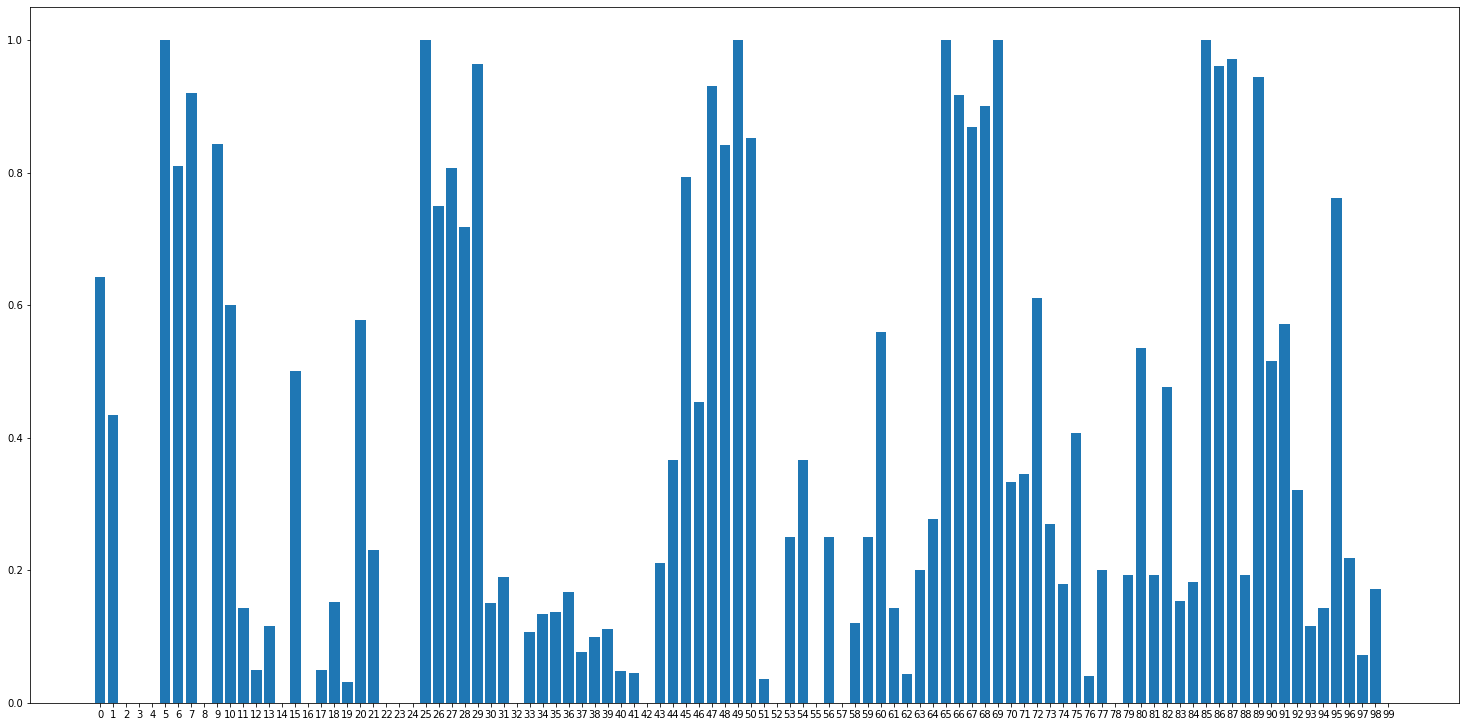

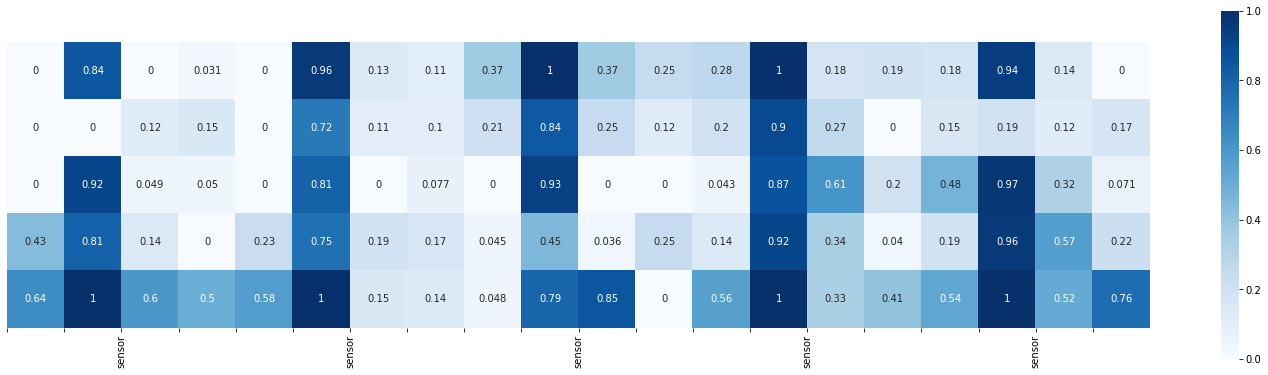

In [19]:
view_dloc(baseline_df['baseline_dloc'])

ed test accuracy: 0.11555555555555555
ed test f1: 0.09603947863281127
ed test precision: 0.12174016396883978
ed test recall: 0.11555555555555555




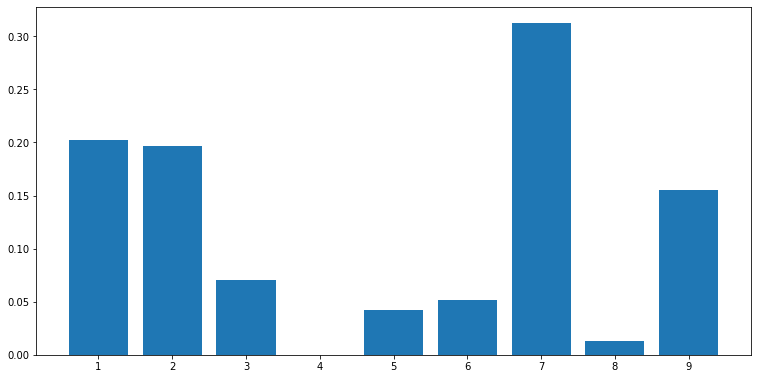

In [20]:
view_ed(baseline_df['baseline_ED'])

In [21]:
view_overload(baseline_df['baseline_overload_loc'])

overload test accuracy: 0.9518518518518518
overload test f1: 0.96836575817254
overload test precision: 0.9908610313378897
overload test recall: 0.9518518518518518


overload=32, accuracy: 0.8750
overload undetected=0, undetected rate: 0.0000
overload wrongloc=4, wrongloc rate: 0.1250
----------------------------------------
y=0, total: 2668, accuracy: 0.9528
y_pred=1, error_num: 80, error_rate: 0.0300
y_pred=2, error_num: 36, error_rate: 0.0135
y_pred=3, error_num: 10, error_rate: 0.0037
----------------------------------------
y=1, total: 12, accuracy: 1.0000
y_pred=0, error_num: 0, error_rate: 0.0000
y_pred=2, error_num: 0, error_rate: 0.0000
y_pred=3, error_num: 0, error_rate: 0.0000
----------------------------------------
y=2, total: 10, accuracy: 0.6000
y_pred=0, error_num: 0, error_rate: 0.0000
y_pred=1, error_num: 1, error_rate: 0.1000
y_pred=3, error_num: 3, error_rate: 0.3000
----------------------------------------
y=3, total: 10, accuracy: 1.0000
y_pred=0, error_num: 0, err

In [8]:
# -----------------------------------------------------------------单任务学习-----------------------------------------------------------------

In [9]:
# -----------------------------------------------------------------单任务学习-----------------------------------------------------------------

In [10]:
# -----------------------------------------------------------------单任务学习-----------------------------------------------------------------

In [44]:
single_dloc_df = pd.read_csv('single-task/single_dloc_pred.csv')
single_ed_df = pd.read_csv('single-task/single_ED_pred.csv')
single_overload_df = pd.read_csv('single-task/single_overload_loc_pred.csv')

dloc test accuracy: 0.6366666666666667
dloc test f1: 0.6360038309175178
dloc test precision: 0.6475836323673405
dloc test recall: 0.6366666666666667




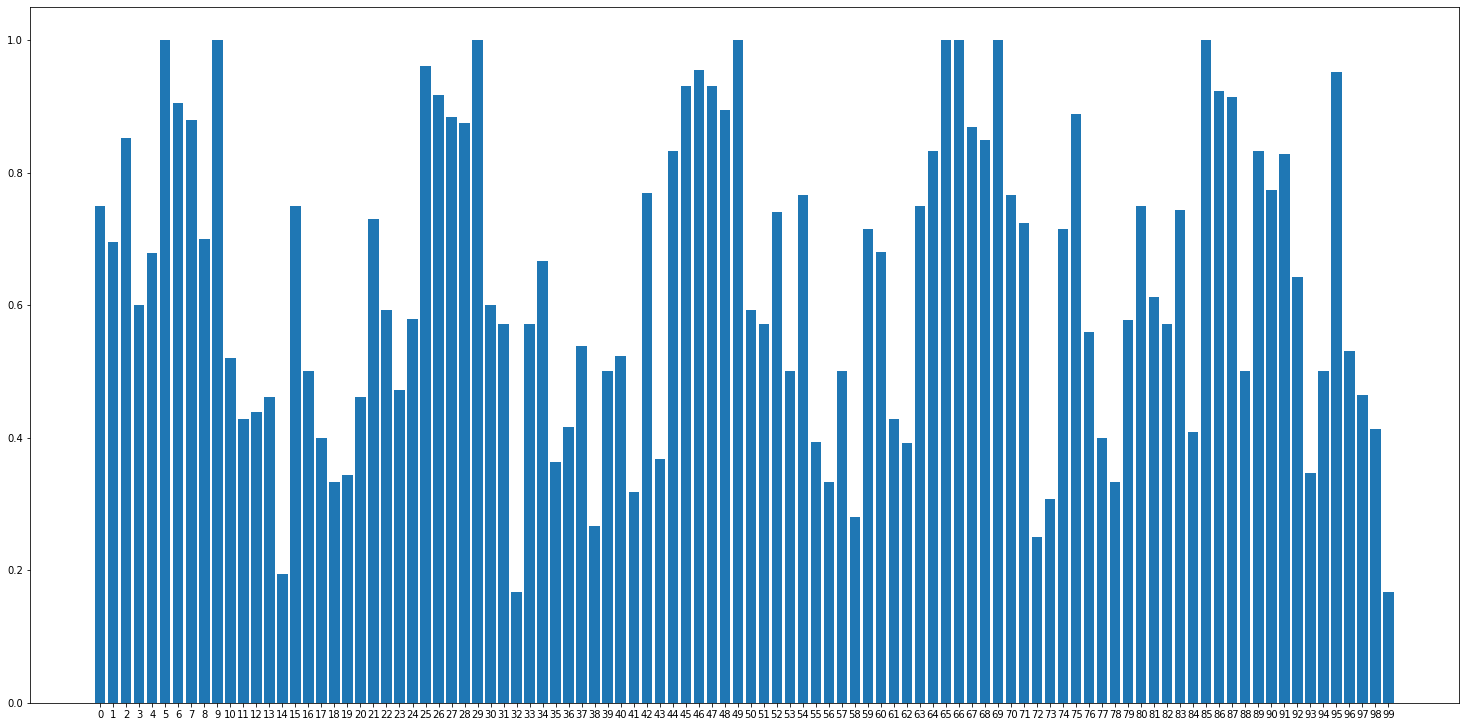

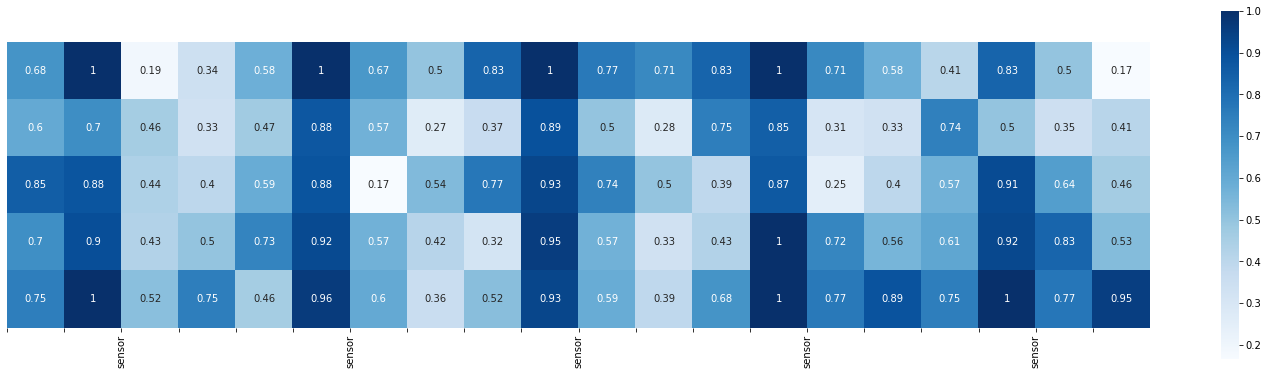

In [24]:
view_dloc(single_dloc_df['bn_after-nodropout'])

ed test accuracy: 0.6229629629629629
ed test f1: 0.6256481471837128
ed test precision: 0.6348861945166278
ed test recall: 0.6229629629629629




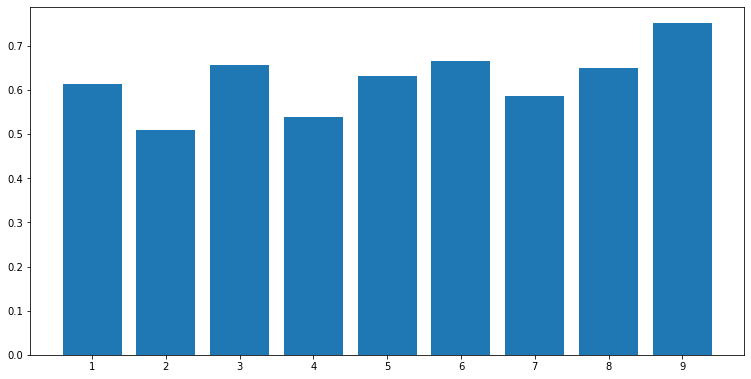

In [28]:
view_ed(single_ed_df['bn_after-nodropout'])

In [29]:
view_overload(single_overload_df['bn_after-nodropout'])

overload test accuracy: 0.997037037037037
overload test f1: 0.9971308771478634
overload test precision: 0.9976230398628775
overload test recall: 0.997037037037037


overload=32, accuracy: 0.8750
overload undetected=1, undetected rate: 0.0312
overload wrongloc=3, wrongloc rate: 0.0938
----------------------------------------
y=0, total: 2668, accuracy: 0.9985
y_pred=1, error_num: 4, error_rate: 0.0015
y_pred=2, error_num: 0, error_rate: 0.0000
y_pred=3, error_num: 0, error_rate: 0.0000
----------------------------------------
y=1, total: 12, accuracy: 0.9167
y_pred=0, error_num: 1, error_rate: 0.0833
y_pred=2, error_num: 0, error_rate: 0.0000
y_pred=3, error_num: 0, error_rate: 0.0000
----------------------------------------
y=2, total: 10, accuracy: 0.7000
y_pred=0, error_num: 0, error_rate: 0.0000
y_pred=1, error_num: 1, error_rate: 0.1000
y_pred=3, error_num: 2, error_rate: 0.2000
----------------------------------------
y=3, total: 10, accuracy: 1.0000
y_pred=0, error_num: 0, error_

In [ ]:
# -----------------------------------------------------------------多任务学习-----------------------------------------------------------------

In [ ]:
# -----------------------------------------------------------------多任务学习-----------------------------------------------------------------

In [11]:
# -----------------------------------------------------------------多任务学习-----------------------------------------------------------------

In [10]:
multi_df = pd.read_csv('multi-task/multi_pred.csv')

In [ ]:
# -----------------------------------------------------------------10个传感器-----------------------------------------------------------------

dloc test accuracy: 0.6844444444444444
dloc test f1: 0.686627049051957
dloc test precision: 0.7078541347569139
dloc test recall: 0.6844444444444444




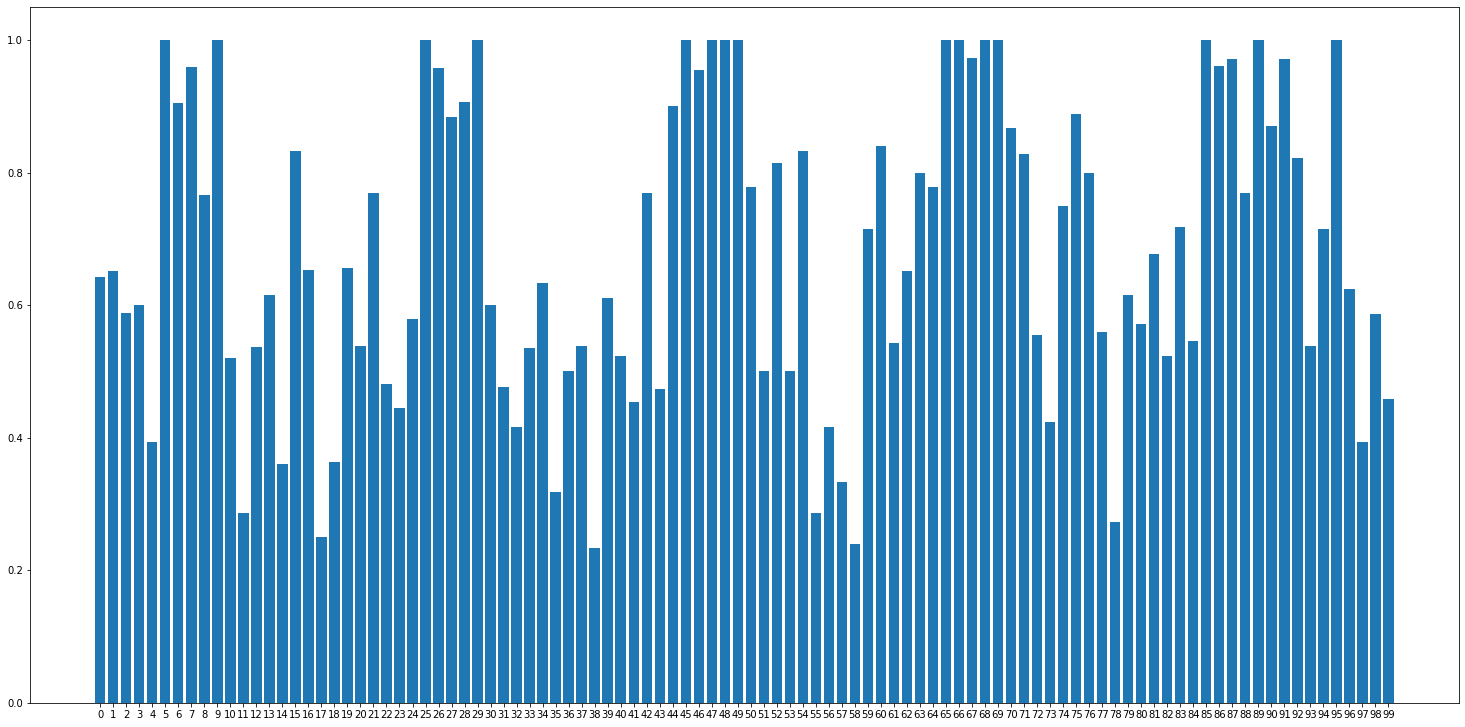

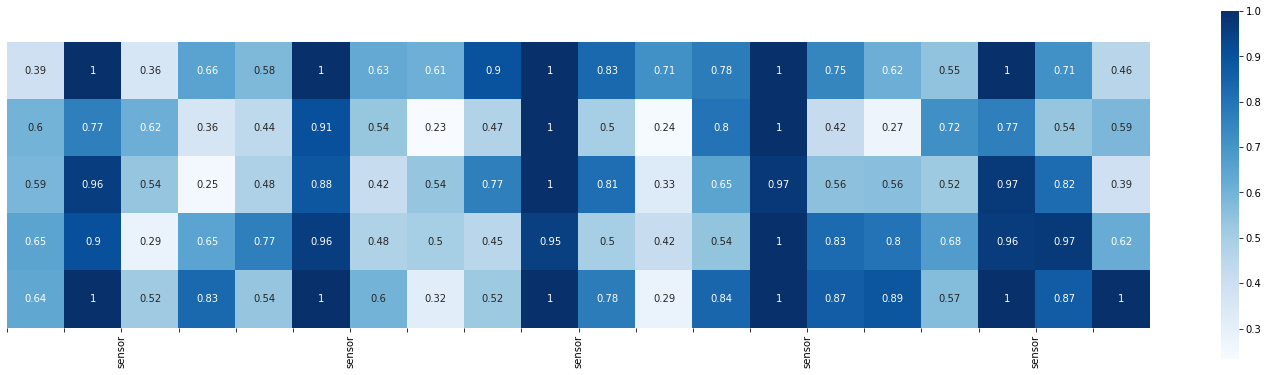

In [31]:
view_dloc(multi_df['bn_after_dloc'])

ed test accuracy: 0.6688888888888889
ed test f1: 0.6697559656145103
ed test precision: 0.6748324864167161
ed test recall: 0.6688888888888889




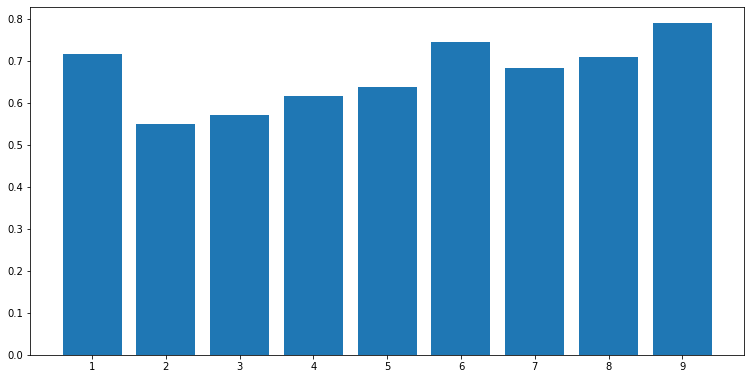

In [32]:
view_ed(multi_df['bn_after_ED'])

In [33]:
view_overload(multi_df['bn_after_overload'])

overload test accuracy: 0.9977777777777778
overload test f1: 0.9976850010303346
overload test precision: 0.997960668822092
overload test recall: 0.9977777777777778


overload=32, accuracy: 0.8125
overload undetected=2, undetected rate: 0.0625
overload wrongloc=4, wrongloc rate: 0.1250
----------------------------------------
y=0, total: 2668, accuracy: 1.0000
y_pred=1, error_num: 0, error_rate: 0.0000
y_pred=2, error_num: 0, error_rate: 0.0000
y_pred=3, error_num: 0, error_rate: 0.0000
----------------------------------------
y=1, total: 12, accuracy: 0.7500
y_pred=0, error_num: 2, error_rate: 0.1667
y_pred=2, error_num: 0, error_rate: 0.0000
y_pred=3, error_num: 1, error_rate: 0.0833
----------------------------------------
y=2, total: 10, accuracy: 0.7000
y_pred=0, error_num: 0, error_rate: 0.0000
y_pred=1, error_num: 1, error_rate: 0.1000
y_pred=3, error_num: 2, error_rate: 0.2000
----------------------------------------
y=3, total: 10, accuracy: 1.0000
y_pred=0, error_num: 0, error

In [ ]:
# -----------------------------------------------------------------6个传感器-----------------------------------------------------------------

dloc test accuracy: 0.5366666666666666
dloc test f1: 0.5353082042284314
dloc test precision: 0.5610376392879083
dloc test recall: 0.5366666666666666




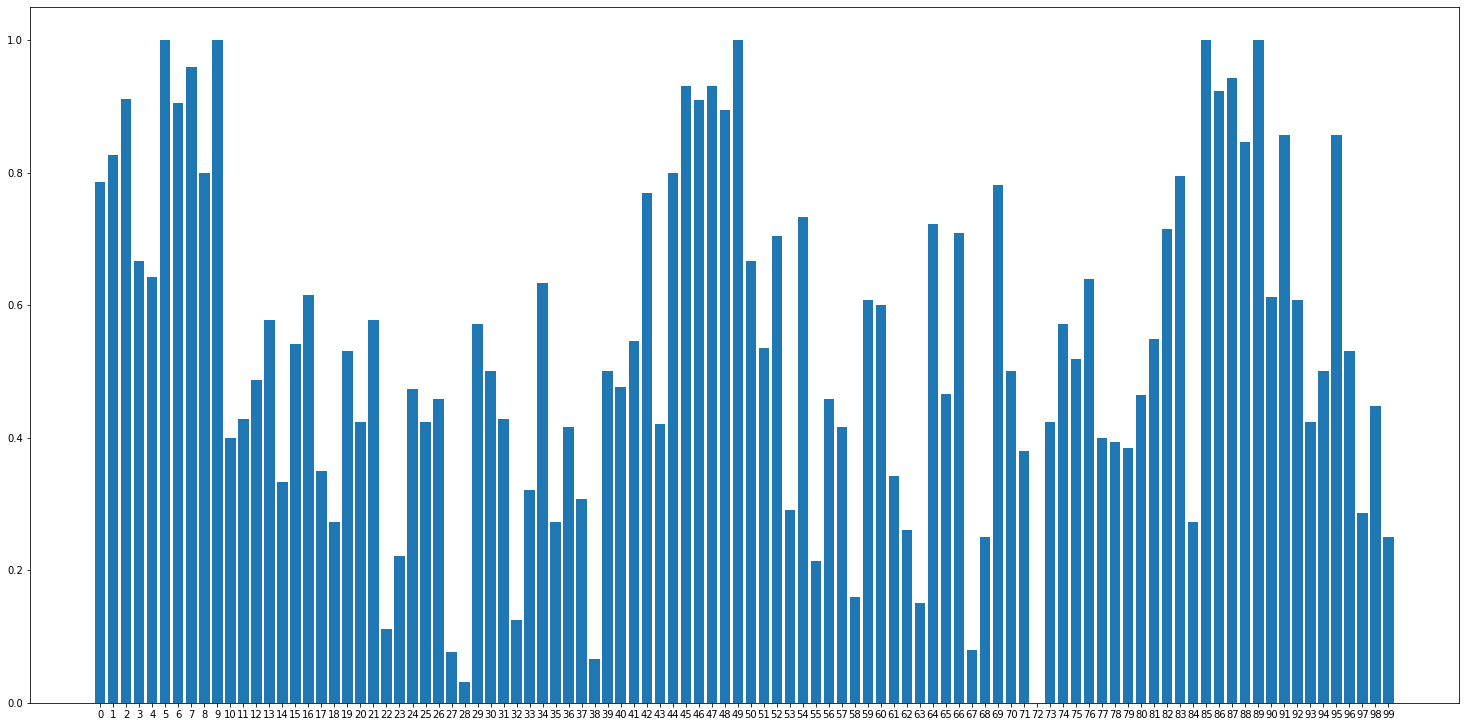

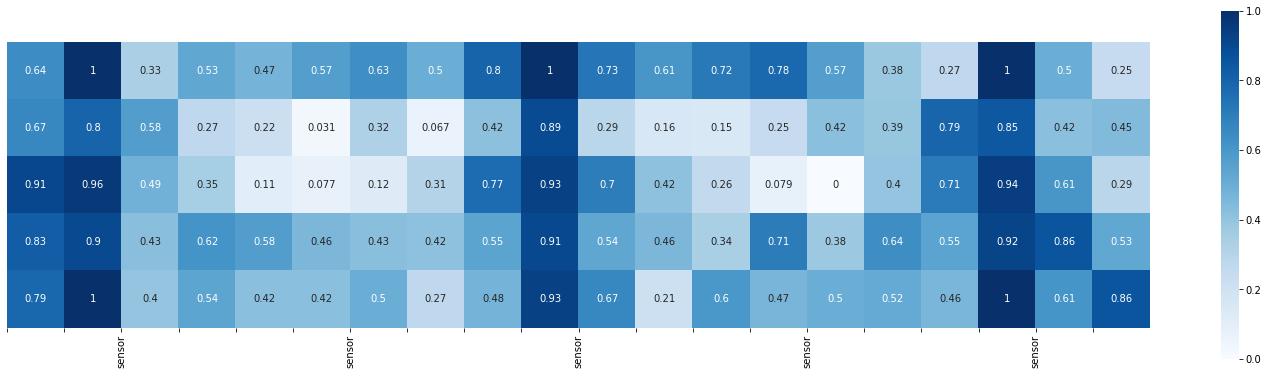

In [36]:
view_dloc(multi_df['bn_after6_dloc'])

ed test accuracy: 0.5622222222222222
ed test f1: 0.563314825905736
ed test precision: 0.5735005194797658
ed test recall: 0.5622222222222222




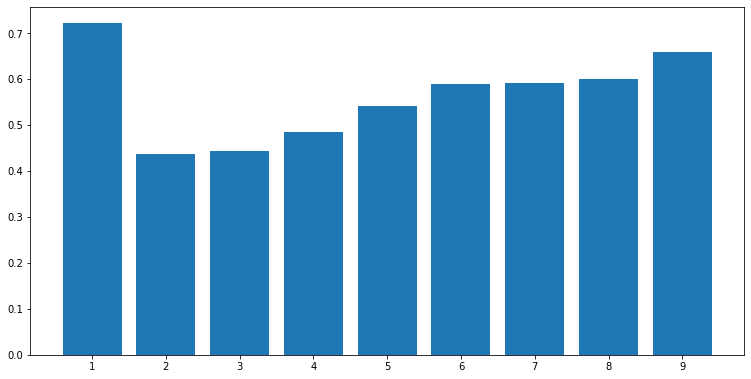

In [37]:
view_ed(multi_df['bn_after6_ED'])

In [38]:
view_overload(multi_df['bn_after6_overload'])

overload test accuracy: 0.9974074074074074
overload test f1: 0.9974297472075249
overload test precision: 0.9975602175602174
overload test recall: 0.9974074074074074


overload=32, accuracy: 0.8438
overload undetected=2, undetected rate: 0.0625
overload wrongloc=3, wrongloc rate: 0.0938
----------------------------------------
y=0, total: 2668, accuracy: 0.9993
y_pred=1, error_num: 2, error_rate: 0.0007
y_pred=2, error_num: 0, error_rate: 0.0000
y_pred=3, error_num: 0, error_rate: 0.0000
----------------------------------------
y=1, total: 12, accuracy: 0.8333
y_pred=0, error_num: 2, error_rate: 0.1667
y_pred=2, error_num: 0, error_rate: 0.0000
y_pred=3, error_num: 0, error_rate: 0.0000
----------------------------------------
y=2, total: 10, accuracy: 0.9000
y_pred=0, error_num: 0, error_rate: 0.0000
y_pred=1, error_num: 1, error_rate: 0.1000
y_pred=3, error_num: 0, error_rate: 0.0000
----------------------------------------
y=3, total: 10, accuracy: 0.8000
y_pred=0, error_num: 0, erro

In [ ]:
# -------------------------------------------------------------4个传感器（两端）--------------------------------------------------------------

dloc test accuracy: 0.4766666666666667
dloc test f1: 0.47612863668721805
dloc test precision: 0.5010619913953325
dloc test recall: 0.4766666666666667




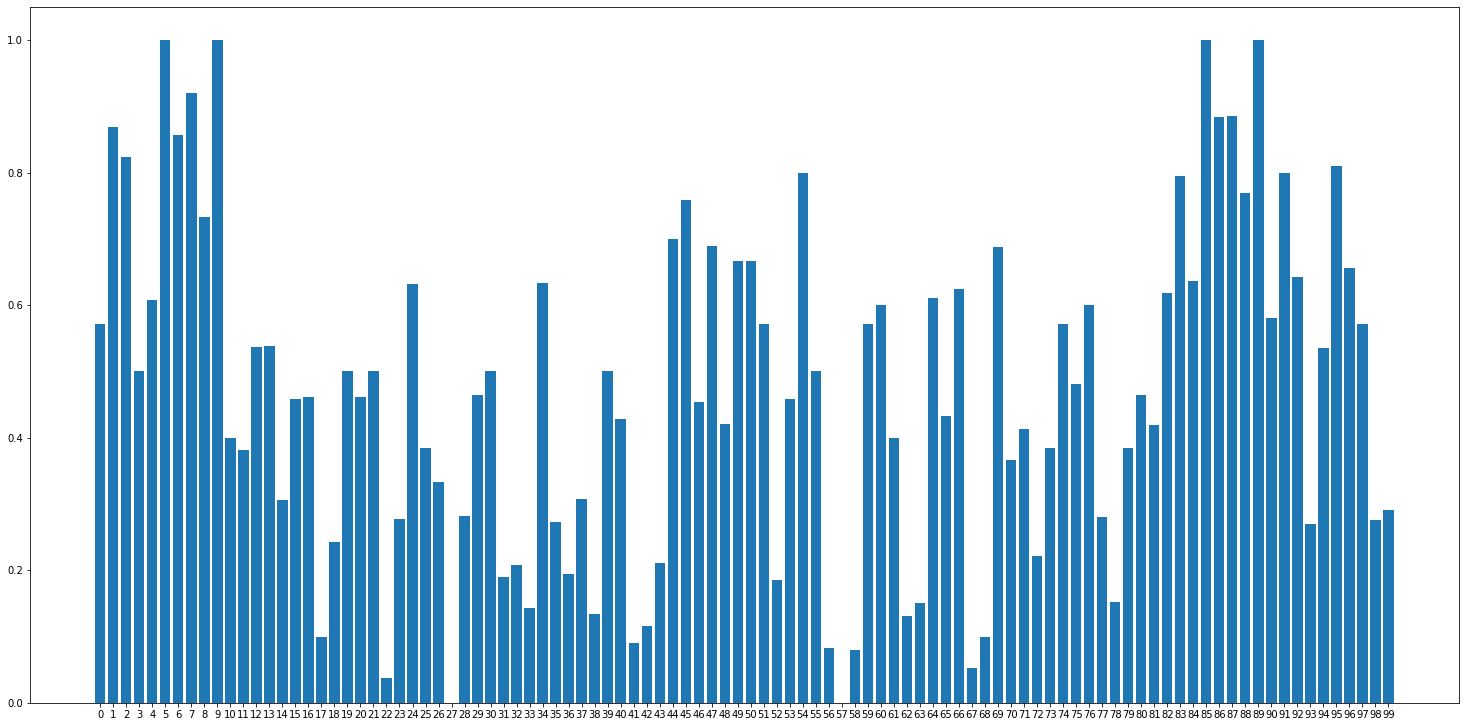

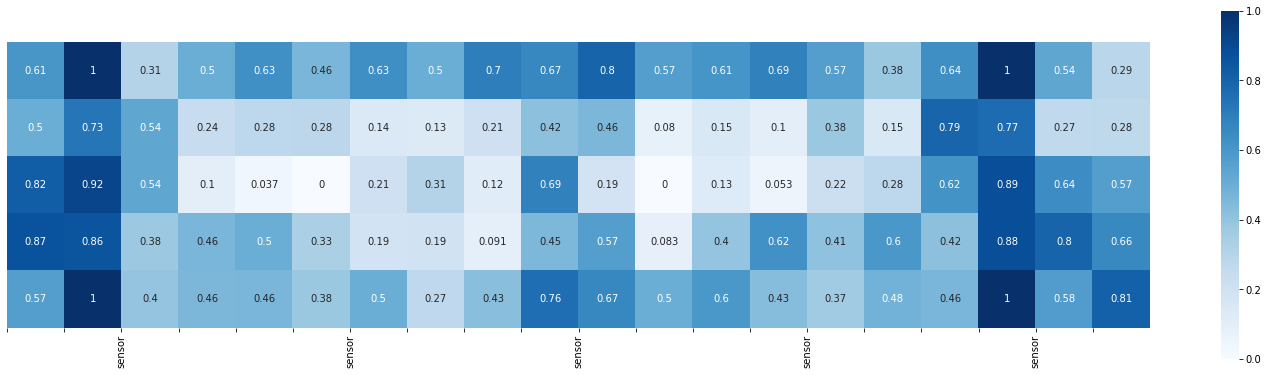

In [39]:
view_dloc(multi_df['bn_after41_dloc'])

ed test accuracy: 0.5181481481481481
ed test f1: 0.5205984458416959
ed test precision: 0.5523339615503419
ed test recall: 0.5181481481481481




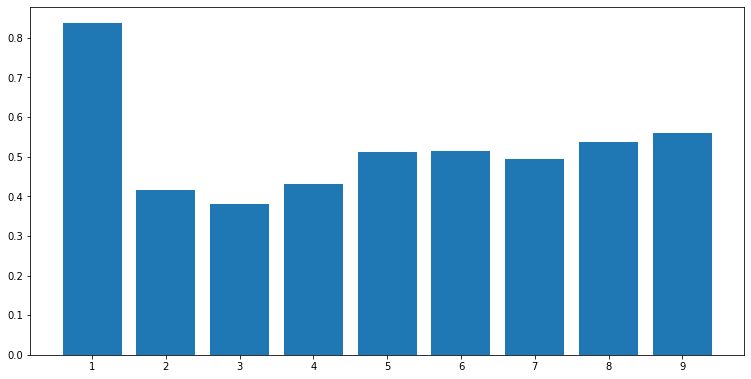

In [40]:
view_ed(multi_df['bn_after41_ED'])

In [41]:
view_overload(multi_df['bn_after41_overload'])

overload test accuracy: 0.9977777777777778
overload test f1: 0.9977631846359594
overload test precision: 0.9978453953800525
overload test recall: 0.9977777777777778


overload=32, accuracy: 0.8438
overload undetected=2, undetected rate: 0.0625
overload wrongloc=3, wrongloc rate: 0.0938
----------------------------------------
y=0, total: 2668, accuracy: 0.9996
y_pred=1, error_num: 1, error_rate: 0.0004
y_pred=2, error_num: 0, error_rate: 0.0000
y_pred=3, error_num: 0, error_rate: 0.0000
----------------------------------------
y=1, total: 12, accuracy: 0.8333
y_pred=0, error_num: 2, error_rate: 0.1667
y_pred=2, error_num: 0, error_rate: 0.0000
y_pred=3, error_num: 0, error_rate: 0.0000
----------------------------------------
y=2, total: 10, accuracy: 0.9000
y_pred=0, error_num: 0, error_rate: 0.0000
y_pred=1, error_num: 1, error_rate: 0.1000
y_pred=3, error_num: 0, error_rate: 0.0000
----------------------------------------
y=3, total: 10, accuracy: 0.8000
y_pred=0, error_num: 0, erro

In [ ]:
# -------------------------------------------------------------4个传感器（中间）--------------------------------------------------------------

dloc test accuracy: 0.5281481481481481
dloc test f1: 0.5268190345124792
dloc test precision: 0.5453880327132985
dloc test recall: 0.5281481481481481




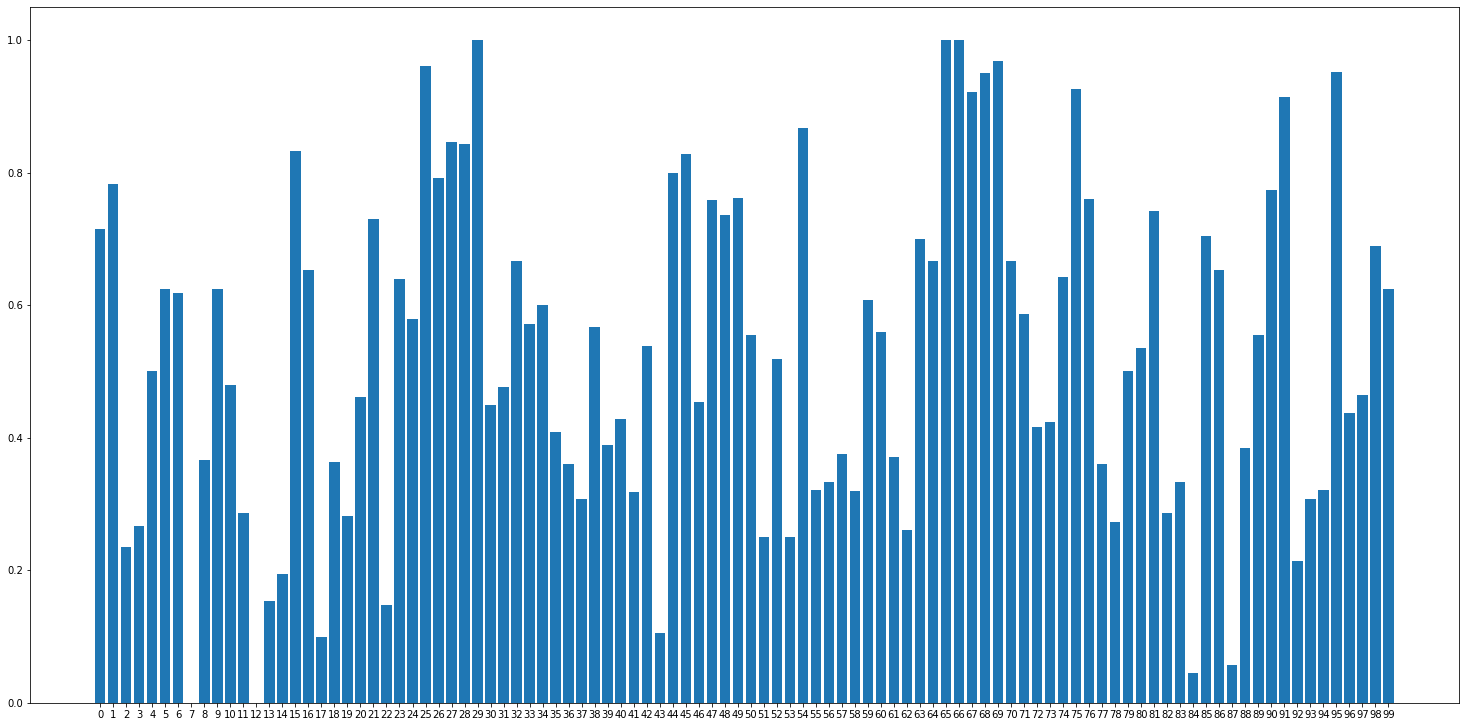

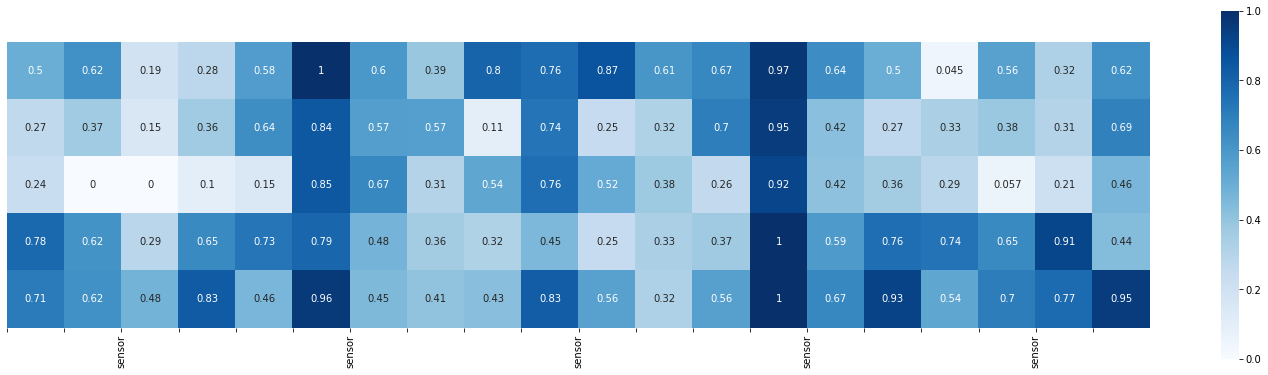

In [42]:
view_dloc(multi_df['bn_after42_dloc'])

ed test accuracy: 0.5577777777777778
ed test f1: 0.5641607958521315
ed test precision: 0.6018435964457131
ed test recall: 0.5577777777777778




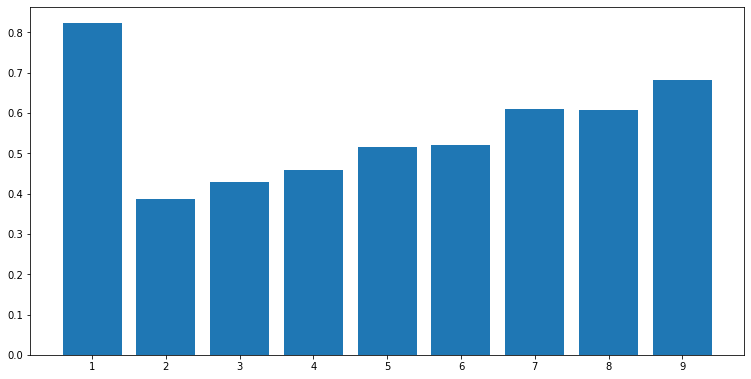

In [43]:
view_ed(multi_df['bn_after42_ED'])

In [44]:
view_overload(multi_df['bn_after42_overload'])

overload test accuracy: 0.9966666666666667
overload test f1: 0.9964773383023334
overload test precision: 0.9970021799708323
overload test recall: 0.9966666666666667


overload=32, accuracy: 0.7812
overload undetected=3, undetected rate: 0.0938
overload wrongloc=4, wrongloc rate: 0.1250
----------------------------------------
y=0, total: 2668, accuracy: 0.9993
y_pred=1, error_num: 2, error_rate: 0.0007
y_pred=2, error_num: 0, error_rate: 0.0000
y_pred=3, error_num: 0, error_rate: 0.0000
----------------------------------------
y=1, total: 12, accuracy: 0.8333
y_pred=0, error_num: 2, error_rate: 0.1667
y_pred=2, error_num: 0, error_rate: 0.0000
y_pred=3, error_num: 0, error_rate: 0.0000
----------------------------------------
y=2, total: 10, accuracy: 0.5000
y_pred=0, error_num: 1, error_rate: 0.1000
y_pred=1, error_num: 2, error_rate: 0.2000
y_pred=3, error_num: 2, error_rate: 0.2000
----------------------------------------
y=3, total: 10, accuracy: 1.0000
y_pred=0, error_num: 0, erro

In [ ]:
# -------------------------------------------------------------两任务（无车载）--------------------------------------------------------------

dloc test accuracy: 0.6944444444444444
dloc test f1: 0.6925878026583198
dloc test precision: 0.7127786111927539
dloc test recall: 0.6944444444444444




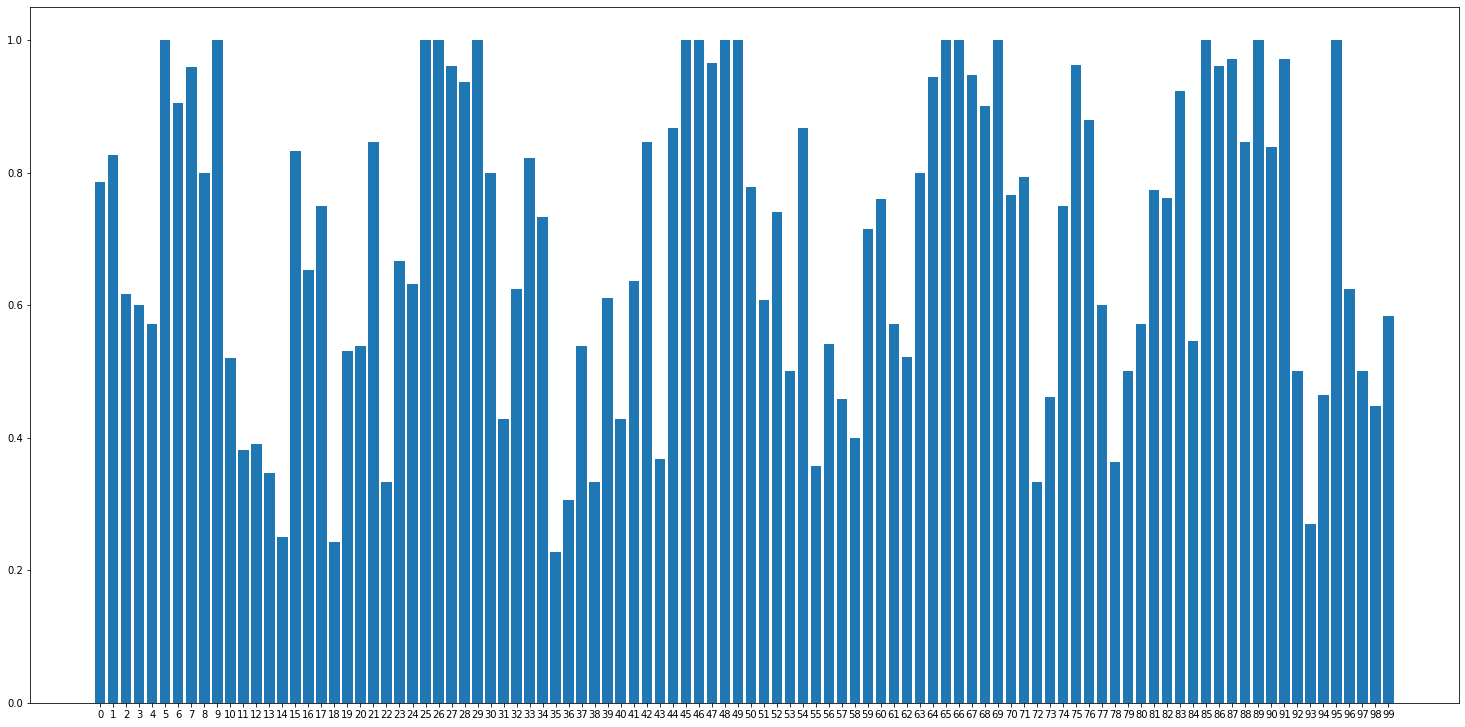

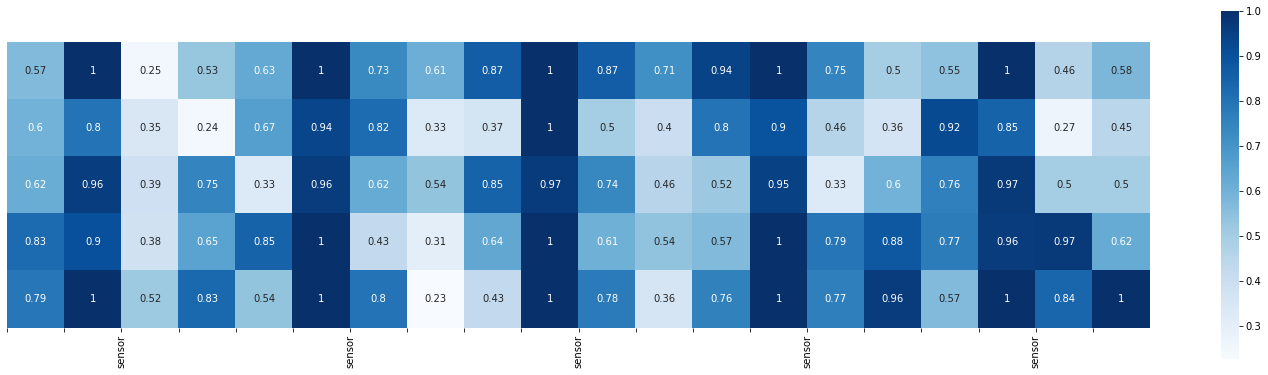

In [34]:
view_dloc(multi_df['two_bn_after_dloc'])

ed test accuracy: 0.6685185185185185
ed test f1: 0.670472358072571
ed test precision: 0.6844067005240707
ed test recall: 0.6685185185185185




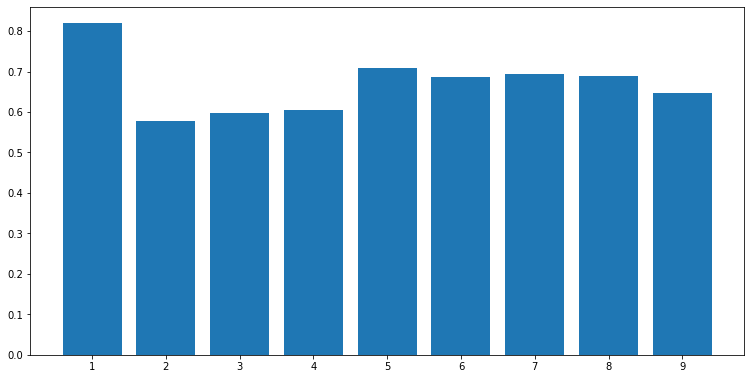

In [35]:
view_ed(multi_df['two_bn_after_ED'])

In [37]:
# 查看dloc提升效果
def view_dloc_improve(y_dloc_pred1, y_dloc_pred2):
    dloc_df = pd.DataFrame({
        'y': y_dloc_test,
        'y_pred1': y_dloc_pred1,
        'y_pred2': y_dloc_pred2
    })
    
    
    dloc_type = 100
    height = 5
    length = int(dloc_type / height)

    dloc_accuracy_list = [dloc_df[(dloc_df['y'] == i) & (dloc_df['y_pred1'] == i)].shape[0] / dloc_df[dloc_df['y']==i].shape[0] for i in range(dloc_type)]
    dloc_accuracy_list2 = [dloc_df[(dloc_df['y'] == i) & (dloc_df['y_pred2'] == i)].shape[0] / dloc_df[dloc_df['y']==i].shape[0] for i in range(dloc_type)]
    
    width = 0.5
    plt.figure(figsize=(25.6, 12.8))
    plt.xticks(np.arange(0, dloc_type, 1.0))
    plt.bar(np.array(list(range(dloc_type))), dloc_accuracy_list2, width=width, label='')
    plt.bar(np.array(list(range(dloc_type))) + width, dloc_accuracy_list, width=width, label='')
    plt.legend()
    
    dloc_accuracy_list = list(np.array(dloc_accuracy_list) - np.array(dloc_accuracy_list2))
    
    plt.figure(figsize=(25.6, 12.8))
    plt.xticks(np.arange(0, dloc_type, 1.0))
    plt.bar(np.array(list(range(dloc_type))), dloc_accuracy_list)
    
    bridge_df = pd.DataFrame()
    for i in range(length):
        start_unit = height * i
        end_unit = height * (i + 1)
        dloc_accuracy_list_slice = dloc_accuracy_list[start_unit: end_unit]
        dloc_accuracy_list_slice.reverse()
        bridge_df['length_unit_%d' % i]  = pd.Series(dloc_accuracy_list_slice)

    plt.figure(figsize=(25.6, 6.4))
    sns.heatmap(bridge_df, annot=True, square=True, vmax=1, cmap="Blues")
    # plt.axis('off')
    scale_ls = range(length)
    index_ls = ['sensor' if i in [2, 6, 10, 14, 18] else '' for i in range(length) ]
    plt.xticks(scale_ls, index_ls)
    plt.yticks([])

In [54]:
# 查看ed提升效果
def view_ed_improve(y_ed_pred1, y_ed_pred2):
    ed_df = pd.DataFrame({
        'y': y_ed_test,
        'y_pred1': y_ed_pred1,
        'y_pred2': y_ed_pred2
    })
    
    
    
    ed_type = 10

    ed_accuracy_list = [ed_df[(ed_df['y'] == i) & (ed_df['y_pred1'] == i)].shape[0] / ed_df[ed_df['y']==i].shape[0] for i in np.arange(1, ed_type)]
    ed_accuracy_list2 = [ed_df[(ed_df['y'] == i) & (ed_df['y_pred2'] == i)].shape[0] / ed_df[ed_df['y']==i].shape[0] for i in np.arange(1, ed_type)]
    
    width = 0.5
    plt.figure(figsize=(12.8, 6.4))
    plt.xticks(np.arange(1, ed_type, 1.0))
    plt.bar(np.arange(1, ed_type, 1.0), ed_accuracy_list2, width=width, label='')
    plt.bar(np.arange(1, ed_type, 1.0) + width, ed_accuracy_list, width=width, label='multi')
    plt.legend()
    
    ed_accuracy_list = list(np.array(ed_accuracy_list) - np.array(ed_accuracy_list2))
    
    plt.figure(figsize=(12.8, 6.4))
    plt.xticks(np.arange(1, ed_type, 1.0))
    plt.bar(list(np.arange(1, ed_type)), ed_accuracy_list)

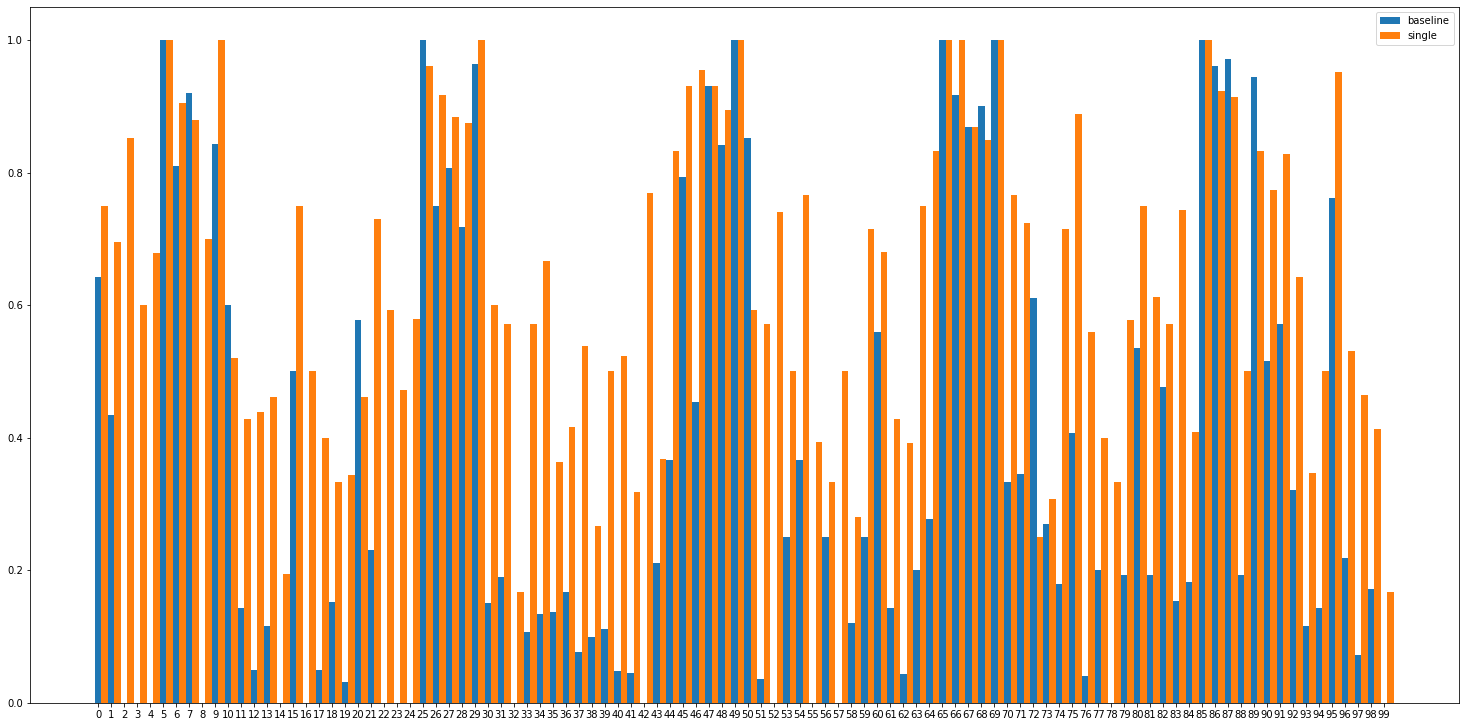

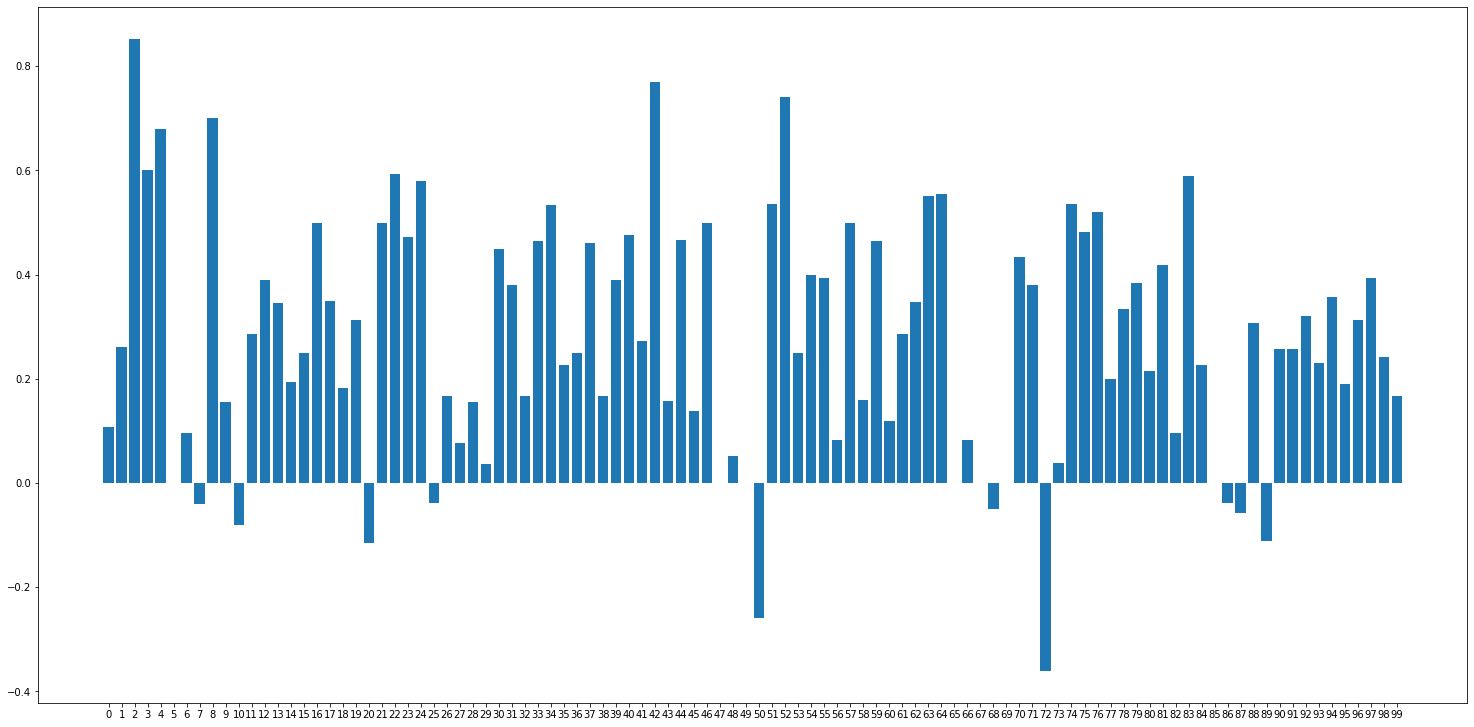

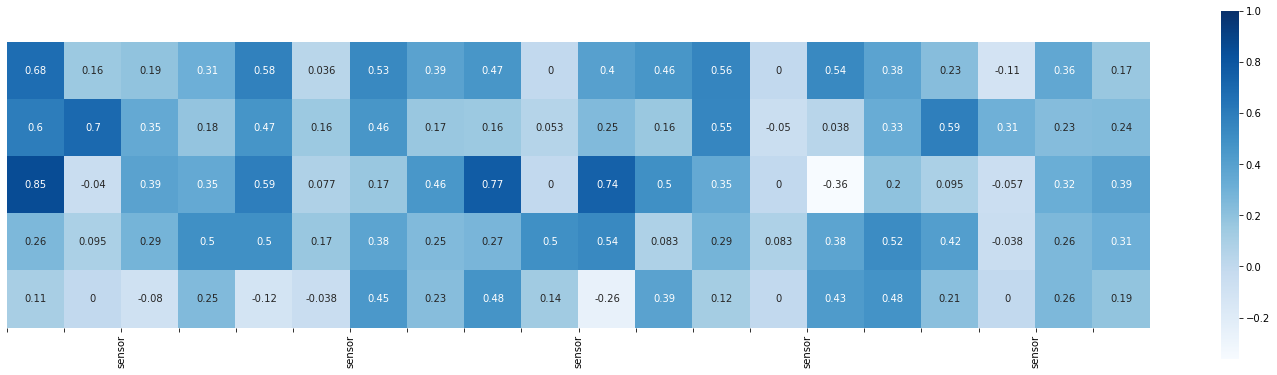

In [36]:
# 单任务学习比baseline提升效果
view_dloc_improve(single_dloc_df['bn_after-nodropout'], baseline_df['baseline_dloc'])

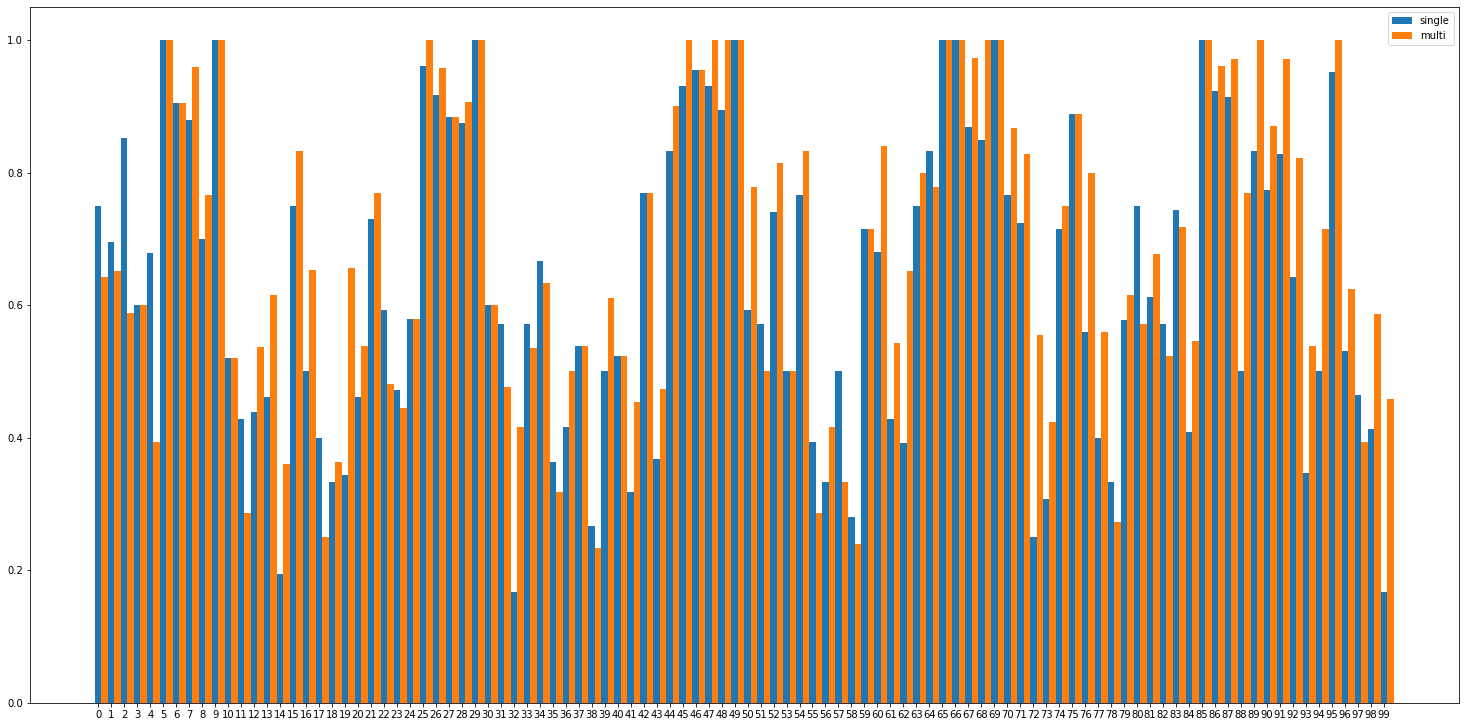

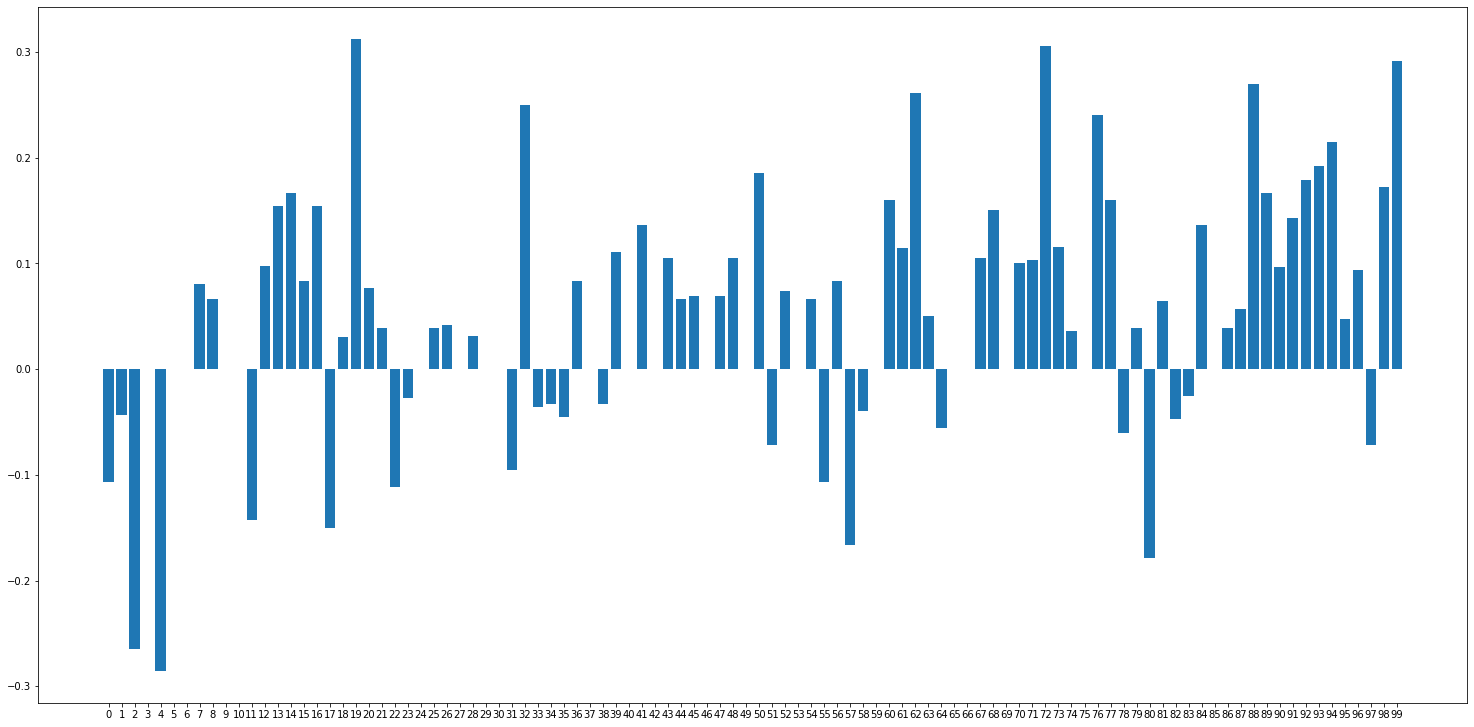

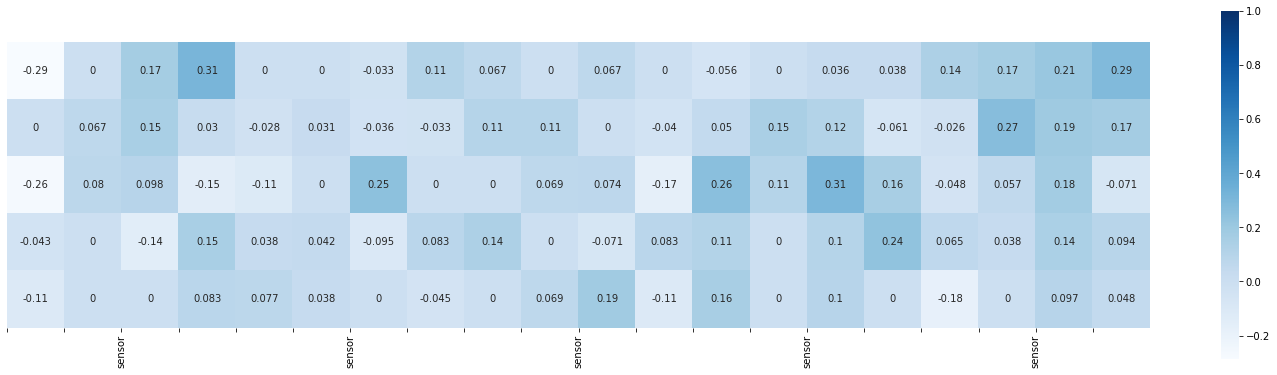

In [38]:
# 多任务学习比单任务学习提升效果
view_dloc_improve(multi_df['bn_after_dloc'], single_dloc_df['bn_after-nodropout'])

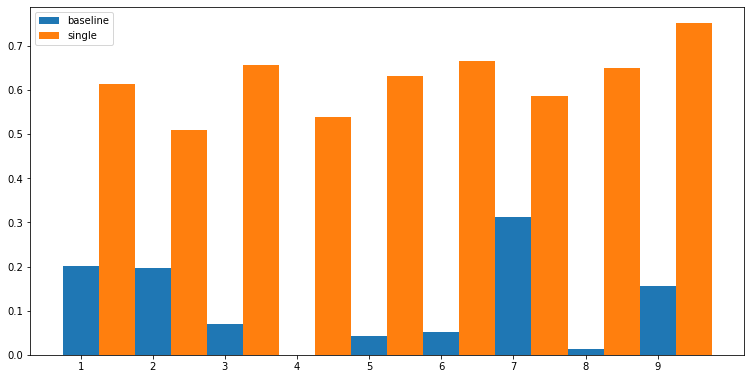

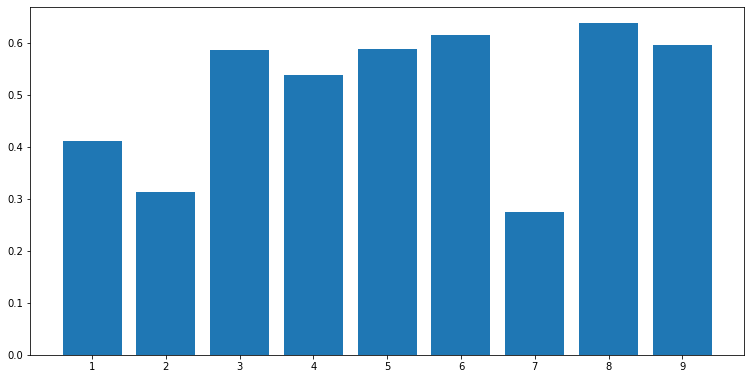

In [53]:
view_ed_improve(single_ed_df['bn_after-nodropout'], baseline_df['baseline_ED'])

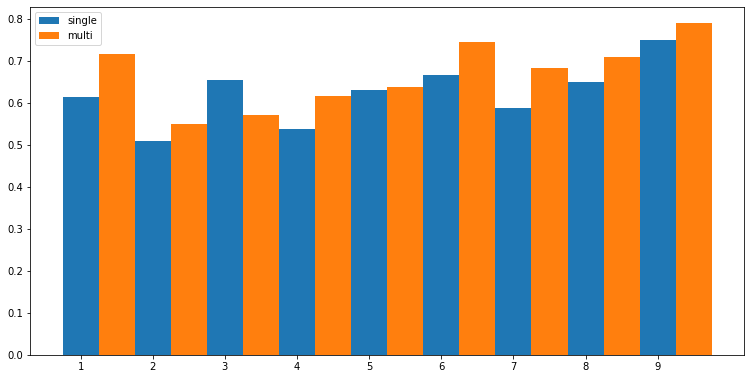

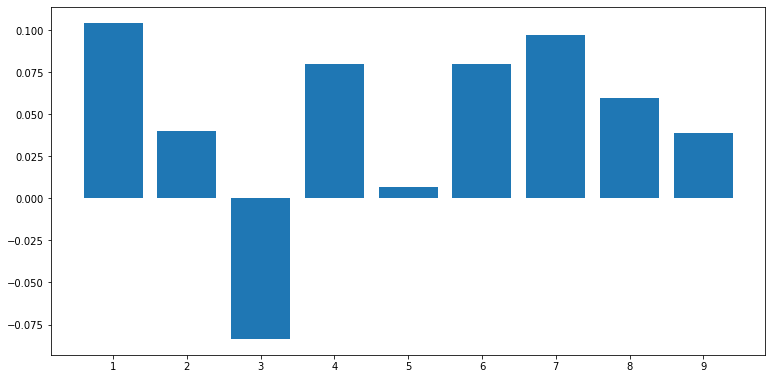

In [55]:
view_ed_improve(multi_df['bn_after_ED'], single_ed_df['bn_after-nodropout'])